# tools for planning observations

In [1]:
__author__ = 'Pascal Louis <plouis35@gmail.com>'
__version__ = '0.1 alpha'
__keywords__ = ['astronomy', 'astropy', 'astroquery', 'matplotlib']


## Configuration

In [100]:
# CALC
obs_latitude = 47.89
obs_longitude = -1.50

target = 'RR lyr'
obs_time = '2023-11-07'      # local time


In [101]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import astropy_mpl_style, quantity_support

plt.style.use(astropy_mpl_style)
quantity_support()


<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x150576d10>

## Show airmass

RR lyr's Altitude at 23:00 = 32.134115499660645 deg


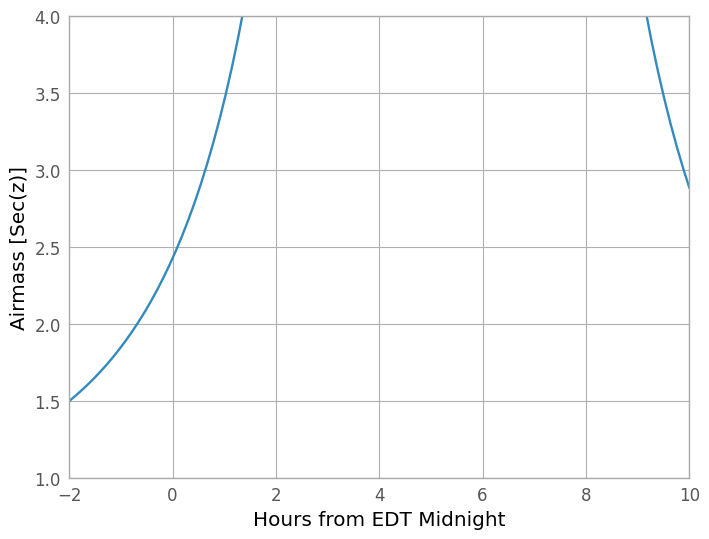

In [102]:

import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time

obj = SkyCoord.from_name(target)

obs_loc = EarthLocation(lat=obs_latitude*u.deg, lon=-obs_longitude*u.deg, height=390*u.m)

utcoffset = +1 * u.hour  # Paris Daylight Time

time = Time(obs_time + ' 23:00:00') - utcoffset

obj_altaz = obj.transform_to(AltAz(obstime=time,location=obs_loc))
print(f"{target}'s Altitude at 23:00 = {obj_altaz.alt}")

midnight = Time(obs_time + ' 00:00:00') - utcoffset

delta_midnight = np.linspace(-2, 10, 100)*u.hour
frame_night = AltAz(obstime=midnight+delta_midnight, location=obs_loc)
obj_altazs_night = obj.transform_to(frame_night)
obj_airmasss_night = obj_altazs_night.secz
plt.plot(delta_midnight, obj_airmasss_night)
plt.xlim(-2, 10)
plt.ylim(1, 4)
plt.xlabel('Hours from EDT Midnight')
plt.ylabel('Airmass [Sec(z)]')
plt.show()


## Show alt and moon/sun rise and set

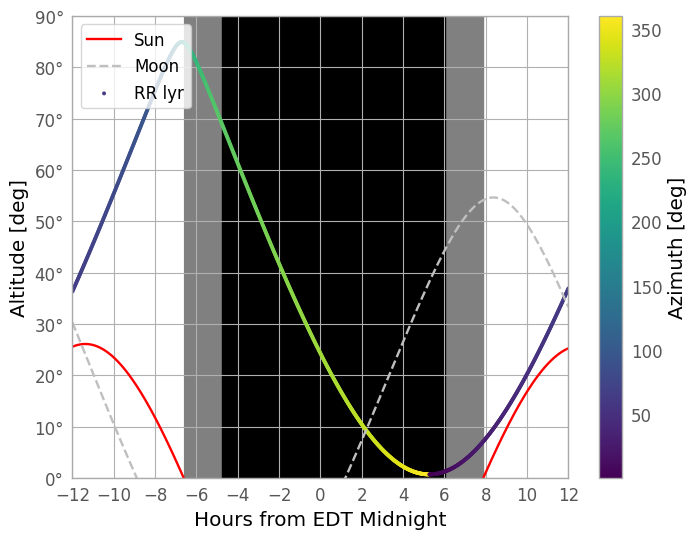

In [103]:
from astropy.coordinates import get_sun
from astropy.coordinates import get_body

### get SUN position
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times_to_tomorow = midnight + delta_midnight
frame_to_tomorow = AltAz(obstime=times_to_tomorow, location=obs_loc)
sunaltazs_to_tomorow = get_sun(times_to_tomorow).transform_to(frame_to_tomorow)

### get MOON position
moon_to_tomorow = get_body("moon", times_to_tomorow)
moonaltazs_to_tomorow= moon_to_tomorow.transform_to(frame_to_tomorow)
obj_altazs_to_tomorow= obj.transform_to(frame_to_tomorow)

plt.plot(delta_midnight, sunaltazs_to_tomorow.alt, color='r', label='Sun')
plt.plot(delta_midnight, moonaltazs_to_tomorow.alt, color=[0.75]*3, ls='--', label='Moon')
plt.scatter(delta_midnight, obj_altazs_to_tomorow.alt,
            c=obj_altazs_to_tomorow.az.value, label=target, lw=0, s=8,
            cmap='viridis')
plt.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 sunaltazs_to_tomorow.alt < -0*u.deg, color='0.5', zorder=0)
plt.fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                 sunaltazs_to_tomorow.alt < -18*u.deg, color='k', zorder=0)
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
plt.xlim(-12*u.hour, 12*u.hour)
plt.xticks((np.arange(13)*2-12)*u.hour)
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from EDT Midnight')
plt.ylabel('Altitude [deg]')
plt.show()


## Show target details

In [104]:
#import module
from astroquery.simbad import Simbad

#get a simbad instance
simbad = Simbad()

#add spectral type parameters for VOTable request
simbad.add_votable_fields('sptype')

#request
result_table = simbad.query_object(target)
#result_table.pprint(show_unit=True)
print(repr(result_table))

#Coordinates
print("\nCoordinates")
print(result_table['RA'][0])
print(result_table['DEC'][0])

#Spectral Type
print("\nSpectral Type")
print(result_table['SP_TYPE'])

<Table length=1>
 MAIN_ID        RA           DEC      RA_PREC DEC_PREC COO_ERR_MAJA ... COO_WAVELENGTH     COO_BIBCODE     SP_TYPE SP_QUAL      SP_BIBCODE     SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"                         mas      ...                                                                                        
  object      str13         str13      int16   int16     float32    ...      str1             object        object   str1         object            int32      
--------- ------------- ------------- ------- -------- ------------ ... -------------- ------------------- ------- ------- ------------------- ----------------
V* RR Lyr 19 25 27.9129 +42 47 03.693      14       14        0.022 ...              O 2020yCat.1350....0G  kA3hF0       D 1994ApJS...93..271S                1

Coordinates
19 25 27.9129
+42 47 03.693

Spectral Type
SP_TYPE
-------
 kA3hF0


## Show field of view

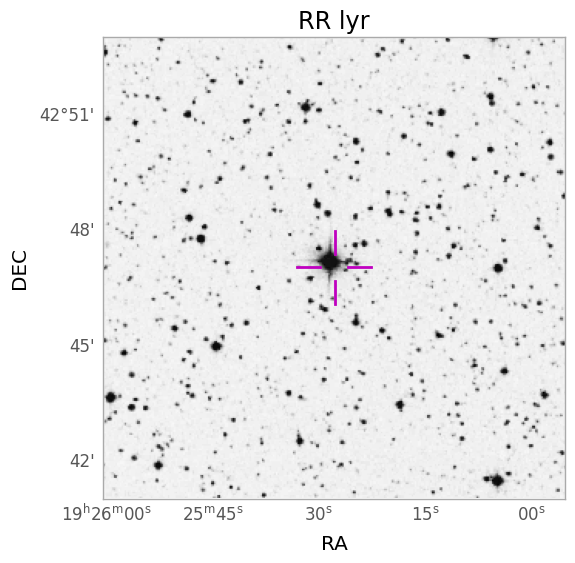

In [105]:
from astroplan.plots import plot_finder_image
from astroplan import FixedTarget
import matplotlib.pyplot as plt
from astroquery.skyview import SkyView

obj_ = FixedTarget.from_name(target)
ax, hdu = plot_finder_image(obj_, survey = "DSS", reticle = True, fov_radius=6*u.arcminute)
plt.show()

#'Optical:SDSS': ['SDSSg',

In [16]:
from astroquery.skyview import SkyView; SkyView.list_surveys()

{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOODS: VLT ISAAC H',
                            'GOODS: 